In [164]:
#Visualizing hundreds of my favourite songs on Spotify.

#Miksha 

# encoding=utf8
import sys
reload(sys)
sys.setdefaultencoding('utf8')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [165]:
df = pd.read_csv('../Data/my_playlist.csv', sep=',', encoding='utf8')

In [166]:
df

,#,TITLE,ARTIST,RELEASE,BPM,ENERGY,DANCE,LOUD,VALENCE,LENGTH,ACOUSTIC,POP.
0,1,Nightcall,Lips,2013-12-11,127,47,92,-8,74,3:47,4,25
1,2,Écho,Lili Poe,2016-09-30,170,67,50,-7,13,3:41,6,36
2,3,Lead Us Home,Hydrogen Sea,2016-09-16,100,63,75,-8,67,3:04,12,15
3,4,Meins sollte Meins sein,Barbara Morgenstern,2015-09-25,120,29,59,-15,8,5:41,94,5
4,5,Familiar,Agnes Obel,2016-10-21,137,41,55,-12,23,3:56,92,52
5,6,The Hunter,Marnie,2013-06-15,118,84,56,-7,49,4:13,6,31
6,7,Easier Said Than Done,Morcheeba,2010,115,36,71,-13,33,3:41,25,26
7,8,Helicopter,Oh Land,2011-06-13,90,47,62,-9,48,3:30,36,18
8,9,In Your Dreams,Dark Dark Dark,2011-03-07,154,54,54,-11,51,3:20,80,40
9,10,Jmy attendais pas,Clea Vincent,2016-06-15,120,69,77,-8,62,4:05,31,30


In [167]:
#get the first 4 characters from Date xxx-xx-xx or xxxx for consistency
df['YEAR'] = df['RELEASE'].str[:4]

In [168]:
df['YEAR'] = df['YEAR'].convert_objects(convert_numeric=True)

In [169]:
# sanity check, we should have 321 samples
#null_data = df[df.isnull().any(axis=1)]
#null_data

In [170]:
df = df.drop('RELEASE', 1)

In [171]:
df

,#,TITLE,ARTIST,BPM,ENERGY,DANCE,LOUD,VALENCE,LENGTH,ACOUSTIC,POP.,YEAR
0,1,Nightcall,Lips,127,47,92,-8,74,3:47,4,25,2013
1,2,Écho,Lili Poe,170,67,50,-7,13,3:41,6,36,2016
2,3,Lead Us Home,Hydrogen Sea,100,63,75,-8,67,3:04,12,15,2016
3,4,Meins sollte Meins sein,Barbara Morgenstern,120,29,59,-15,8,5:41,94,5,2015
4,5,Familiar,Agnes Obel,137,41,55,-12,23,3:56,92,52,2016
5,6,The Hunter,Marnie,118,84,56,-7,49,4:13,6,31,2013
6,7,Easier Said Than Done,Morcheeba,115,36,71,-13,33,3:41,25,26,2010
7,8,Helicopter,Oh Land,90,47,62,-9,48,3:30,36,18,2011
8,9,In Your Dreams,Dark Dark Dark,154,54,54,-11,51,3:20,80,40,2011
9,10,Jmy attendais pas,Clea Vincent,120,69,77,-8,62,4:05,31,30,2016


In [172]:
#hack because pandas thinks that our minutes are hours
time = pd.DatetimeIndex(df['LENGTH'])
seconds = time.hour * 60 + time.minute

In [173]:
(df['Seconds']) = seconds

In [174]:
df = df.drop('LENGTH', 1)

In [175]:
df.to_csv('spotify_cleaned.csv')

In [176]:
df

,#,TITLE,ARTIST,BPM,ENERGY,DANCE,LOUD,VALENCE,ACOUSTIC,POP.,YEAR,Seconds
0,1,Nightcall,Lips,127,47,92,-8,74,4,25,2013,227
1,2,Écho,Lili Poe,170,67,50,-7,13,6,36,2016,221
2,3,Lead Us Home,Hydrogen Sea,100,63,75,-8,67,12,15,2016,184
3,4,Meins sollte Meins sein,Barbara Morgenstern,120,29,59,-15,8,94,5,2015,341
4,5,Familiar,Agnes Obel,137,41,55,-12,23,92,52,2016,236
5,6,The Hunter,Marnie,118,84,56,-7,49,6,31,2013,253
6,7,Easier Said Than Done,Morcheeba,115,36,71,-13,33,25,26,2010,221
7,8,Helicopter,Oh Land,90,47,62,-9,48,36,18,2011,210
8,9,In Your Dreams,Dark Dark Dark,154,54,54,-11,51,80,40,2011,200
9,10,Jmy attendais pas,Clea Vincent,120,69,77,-8,62,31,30,2016,245


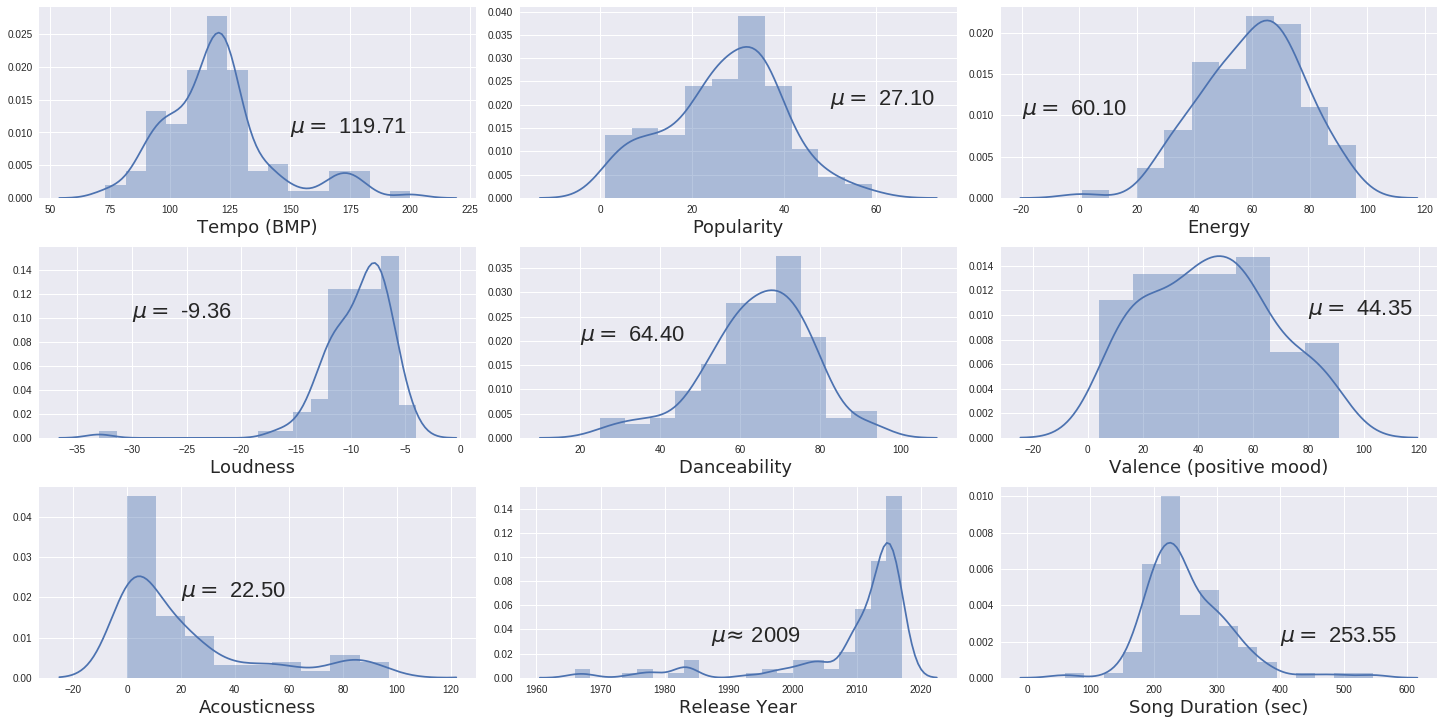

In [177]:
plt.figure(1, figsize=(20, 10),)

hfont = {'fontname':'Proxima Nova'}

plt.subplot(331)
sns.distplot(df.BPM);
plt.text(150, .010, r'$\mu=\ $' '%.2f' % df['BPM'].mean(), fontsize=22)
plt.xlabel('Tempo (BMP)', fontsize=18, **hfont)
plt.grid(True)

plt.subplot(332)
sns.distplot(df['POP.']);
plt.text(50, .020, r'$\mu=\ $' '%.2f' % df['POP.'].mean(), fontsize=22)
plt.xlabel('Popularity', fontsize=18, **hfont)
plt.grid(True)

plt.subplot(333)
sns.distplot(df.ENERGY);
plt.text(-20, .010, r'$\mu=\ $' '%.2f' % df['ENERGY'].mean(), fontsize=22)
plt.xlabel('Energy', fontsize=18, **hfont)
plt.grid(True)

plt.subplot(334)
sns.distplot(df.LOUD);
plt.text(-30, 0.10, r'$\mu=\ $' '%.2f' % df['LOUD'].mean(), fontsize=22)
plt.xlabel('Loudness  ', fontsize=18, **hfont)
plt.grid(True)

plt.subplot(335)
sns.distplot(df.DANCE);
plt.text(20, 0.02, r'$\mu=\ $' '%.2f' % df['DANCE'].mean(), fontsize=22)
plt.xlabel('Danceability ', fontsize=18, **hfont)
plt.grid(True)

plt.subplot(336)
sns.distplot(df.VALENCE);
plt.text(80, 0.01, r'$\mu=\ $' '%.2f' % df['VALENCE'].mean(), fontsize=22)
plt.xlabel('Valence (positive mood)', fontsize=18, **hfont)
plt.grid(True)

plt.subplot(337)
sns.distplot(df.ACOUSTIC);
plt.text(20, 0.02, r'$\mu=\ $' '%.2f' % df['ACOUSTIC'].mean(), fontsize=22)
plt.xlabel('Acousticness', fontsize=18, **hfont)
plt.grid(True)

plt.subplot(338)
sns.distplot(df.YEAR);
plt.xlabel('Release Year', fontsize=18, **hfont)
plt.grid(True)

plt.subplot(339)
sns.distplot(df.Seconds);
#this corresponds to YEAR above, but somehow Matplot fucked it up when changing it
plt.text(-500, 0.002, r'$\mu≈\ $'  '%.f' % df['YEAR'].mean(), fontsize=22)

#Seconds 
plt.text(400, 0.002, r'$\mu=\ $' '%.2f' % df['Seconds'].mean(), fontsize=22)
plt.xlabel('Song Duration (sec)', fontsize=18, **hfont)
plt.grid(True)

plt.tight_layout(pad=0.5, w_pad=0.6, h_pad=1.0)

In [178]:
df.describe(include = 'all')

,#,TITLE,ARTIST,BPM,ENERGY,DANCE,LOUD,VALENCE,ACOUSTIC,POP.,YEAR,Seconds
count,115.000000,115,115,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000
unique,NaN,115,97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Narayan,Clea Vincent,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,58.000000,NaN,NaN,119.713043,60.095652,64.400000,-9.356522,44.347826,22.504348,27.095652,2009.156522,253.547826
std,33.341666,NaN,NaN,23.023544,17.406882,13.292129,3.392953,23.172898,27.892140,12.499104,10.893899,66.991783
min,1.000000,NaN,NaN,73.000000,1.000000,25.000000,-33.000000,4.000000,0.000000,1.000000,1966.000000,60.000000
25%,29.500000,NaN,NaN,105.500000,48.000000,57.500000,-11.000000,25.000000,2.000000,19.500000,2009.000000,211.500000
50%,58.000000,NaN,NaN,120.000000,62.000000,65.000000,-9.000000,42.000000,11.000000,28.000000,2014.000000,238.000000
75%,86.500000,NaN,NaN,126.500000,72.500000,74.000000,-7.000000,59.500000,29.500000,35.000000,2015.000000,289.000000


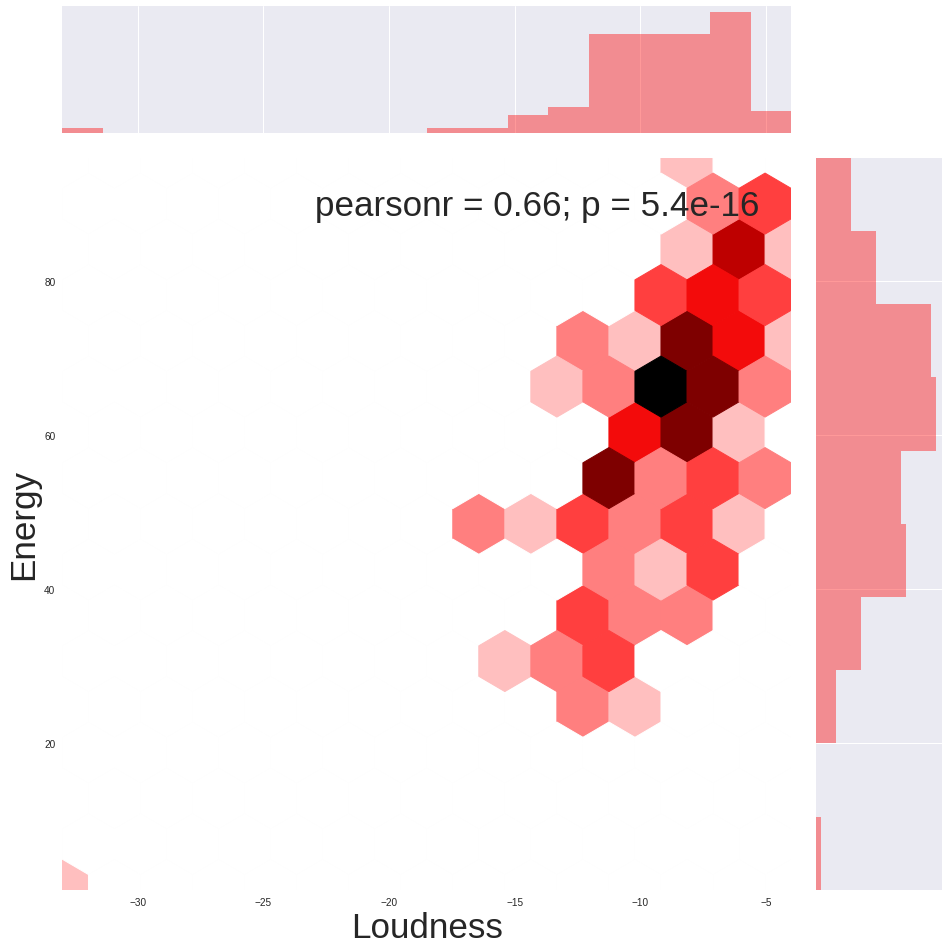

In [179]:
plt.rc("legend", fontsize=35)
sns.jointplot(y=df['ENERGY'], x=df['LOUD'], kind="hex", color="r", size=13).set_axis_labels("Loudness", "Energy", fontsize=35)
#sns.jointplot(y=df['ENERGY'], x=df['ACOUSTIC'], kind="hex", color="r", size=13).set_axis_labels("Acousticness", "Energy", fontsize=35)
#sns.jointplot(y=df['DANCE'], x=df['VALENCE'], kind="hex", color="r", size=13).set_axis_labels("Valence (positive mood)", "Danceability", fontsize=35)
#sns.jointplot(y=df['ACOUSTIC'], x=df['LOUD'], kind="hex", color="r", size=13).set_axis_labels("Loudness", "Acousticness", fontsize=35)
#sns.jointplot(y=df['ENERGY'], x=df['VALENCE'], kind="hex", color="r", size=13).set_axis_labels("Valence (positive mood)", "Energy", fontsize=35)
#sns.jointplot(y=df['POP.'], x=df['ENERGY'], kind="hex", color="r", size=13).set_axis_labels("Energy", "Popularity", fontsize=35)
#sns.jointplot(y=df['YEAR'], x=df['LOUD'], kind="hex", color="r", size=13).set_axis_labels("Loudness", "Release Year", fontsize=35)

In [180]:
df

,#,TITLE,ARTIST,BPM,ENERGY,DANCE,LOUD,VALENCE,ACOUSTIC,POP.,YEAR,Seconds
0,1,Nightcall,Lips,127,47,92,-8,74,4,25,2013,227
1,2,Écho,Lili Poe,170,67,50,-7,13,6,36,2016,221
2,3,Lead Us Home,Hydrogen Sea,100,63,75,-8,67,12,15,2016,184
3,4,Meins sollte Meins sein,Barbara Morgenstern,120,29,59,-15,8,94,5,2015,341
4,5,Familiar,Agnes Obel,137,41,55,-12,23,92,52,2016,236
5,6,The Hunter,Marnie,118,84,56,-7,49,6,31,2013,253
6,7,Easier Said Than Done,Morcheeba,115,36,71,-13,33,25,26,2010,221
7,8,Helicopter,Oh Land,90,47,62,-9,48,36,18,2011,210
8,9,In Your Dreams,Dark Dark Dark,154,54,54,-11,51,80,40,2011,200
9,10,Jmy attendais pas,Clea Vincent,120,69,77,-8,62,31,30,2016,245


In [181]:
x = df.drop(['#', 'TITLE', 'ARTIST'], axis=1)
#y = df['POP.']
x

,BPM,ENERGY,DANCE,LOUD,VALENCE,ACOUSTIC,POP.,YEAR,Seconds
0,127,47,92,-8,74,4,25,2013,227
1,170,67,50,-7,13,6,36,2016,221
2,100,63,75,-8,67,12,15,2016,184
3,120,29,59,-15,8,94,5,2015,341
4,137,41,55,-12,23,92,52,2016,236
5,118,84,56,-7,49,6,31,2013,253
6,115,36,71,-13,33,25,26,2010,221
7,90,47,62,-9,48,36,18,2011,210
8,154,54,54,-11,51,80,40,2011,200
9,120,69,77,-8,62,31,30,2016,245


In [182]:
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2).fit_transform(x)

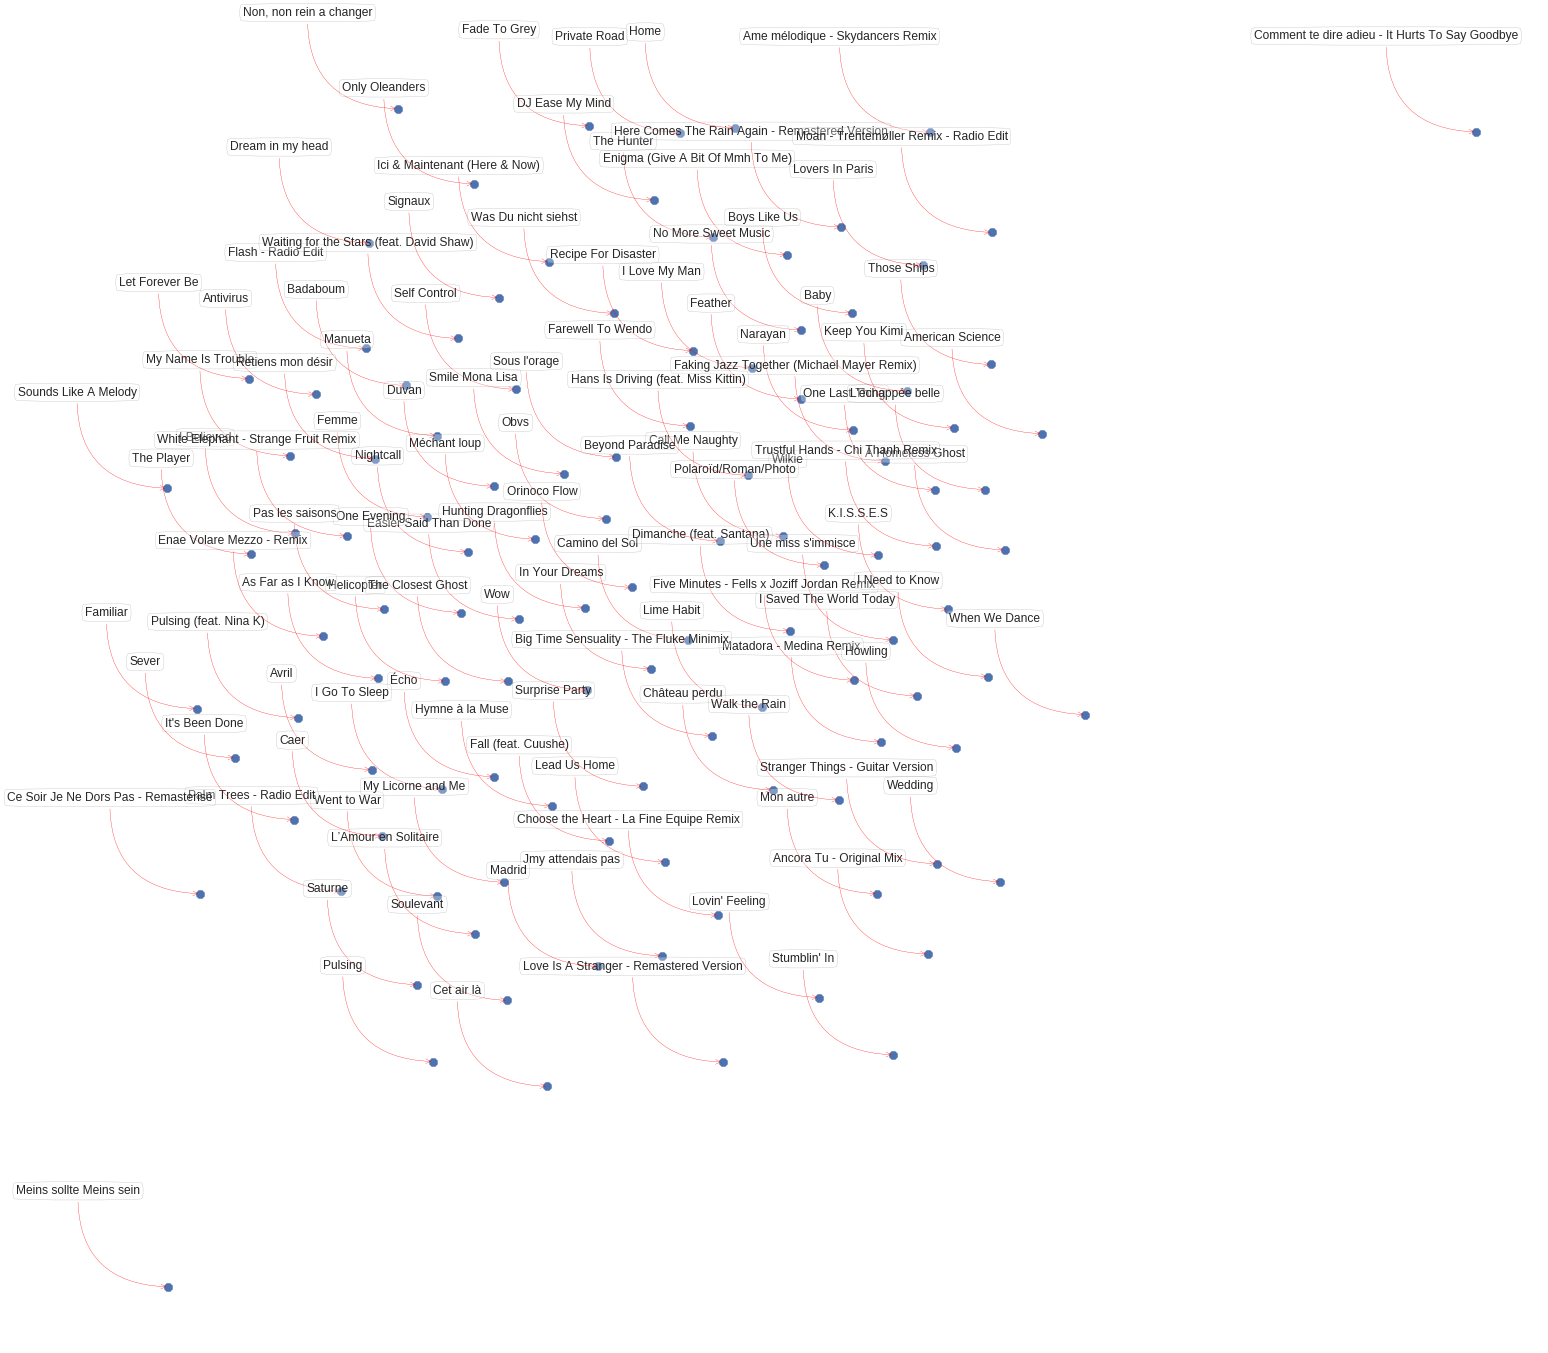

In [183]:
from matplotlib.pyplot import *
fig = figure(figsize=(20, 20))
ax = axes(frameon=False)
setp(ax, xticks=(), yticks=())
subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=0.9,
                wspace=0.0, hspace=0.0)
scatter(X_embedded[:, 0], X_embedded[:, 1], s=80,   marker="8")

for row_id in range(0, len(df)):
    #if (df.ARTIST[row_id] in ['Clea Vincent']):
        target_word = df.TITLE[row_id]
        xx = X_embedded[row_id, 0]
        yy = X_embedded[row_id, 1]
        plt.annotate(target_word, (xx,yy), size=12, xytext=(-90,90), 
            textcoords='offset points', ha='center', va='bottom',
            bbox=dict(boxstyle='round4', fc='white', alpha=0.3),
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.5', 
                            color='red'))

In [184]:
df.to_pickle('spotify_dataframe.pkl')

In [185]:
x.corr()
# ENERGY LOUD 0.66
# ENERGY ACOUSTIC -0.66
# DANCE VALENCE 0.40
# ACOUSTIC LOUD -0.43
# ENERGY VALENCE 0.24
# POP ENERGY 0.027
# YEAR LOUD 0.21

,BPM,ENERGY,DANCE,LOUD,VALENCE,ACOUSTIC,POP.,YEAR,Seconds
BPM,1.000000,0.119861,-0.225002,-0.086550,0.015710,-0.023404,-0.139390,0.021060,-0.130351
ENERGY,0.119861,1.000000,0.074824,0.664781,0.238109,-0.658020,0.026648,0.038685,0.166409
DANCE,-0.225002,0.074824,1.000000,0.198469,0.395341,-0.205068,0.132186,0.121811,0.052504
LOUD,-0.086550,0.664781,0.198469,1.000000,0.169388,-0.429094,0.035974,0.214399,0.115485
VALENCE,0.015710,0.238109,0.395341,0.169388,1.000000,-0.191906,0.133746,-0.168676,-0.207591
ACOUSTIC,-0.023404,-0.658020,-0.205068,-0.429094,-0.191906,1.000000,-0.027867,-0.062734,-0.138412
POP.,-0.139390,0.026648,0.132186,0.035974,0.133746,-0.027867,1.000000,-0.179204,0.111747
YEAR,0.021060,0.038685,0.121811,0.214399,-0.168676,-0.062734,-0.179204,1.000000,0.054955
Seconds,-0.130351,0.166409,0.052504,0.115485,-0.207591,-0.138412,0.111747,0.054955,1.000000


In [186]:
x

,BPM,ENERGY,DANCE,LOUD,VALENCE,ACOUSTIC,POP.,YEAR,Seconds
0,127,47,92,-8,74,4,25,2013,227
1,170,67,50,-7,13,6,36,2016,221
2,100,63,75,-8,67,12,15,2016,184
3,120,29,59,-15,8,94,5,2015,341
4,137,41,55,-12,23,92,52,2016,236
5,118,84,56,-7,49,6,31,2013,253
6,115,36,71,-13,33,25,26,2010,221
7,90,47,62,-9,48,36,18,2011,210
8,154,54,54,-11,51,80,40,2011,200
9,120,69,77,-8,62,31,30,2016,245


In [187]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(x)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [188]:
print(pca.explained_variance_ratio_)

In [189]:
x_pca = pca.fit_transform(x)

In [190]:
from sklearn import svm
clf = svm.OneClassSVM(kernel="rbf", gamma=0.001, nu=0.3)
clf.fit(x_pca)

OneClassSVM(cache_size=200, coef0=0.0, degree=3, gamma=0.001, kernel='rbf',
      max_iter=-1, nu=0.3, random_state=None, shrinking=True, tol=0.001,
      verbose=False)

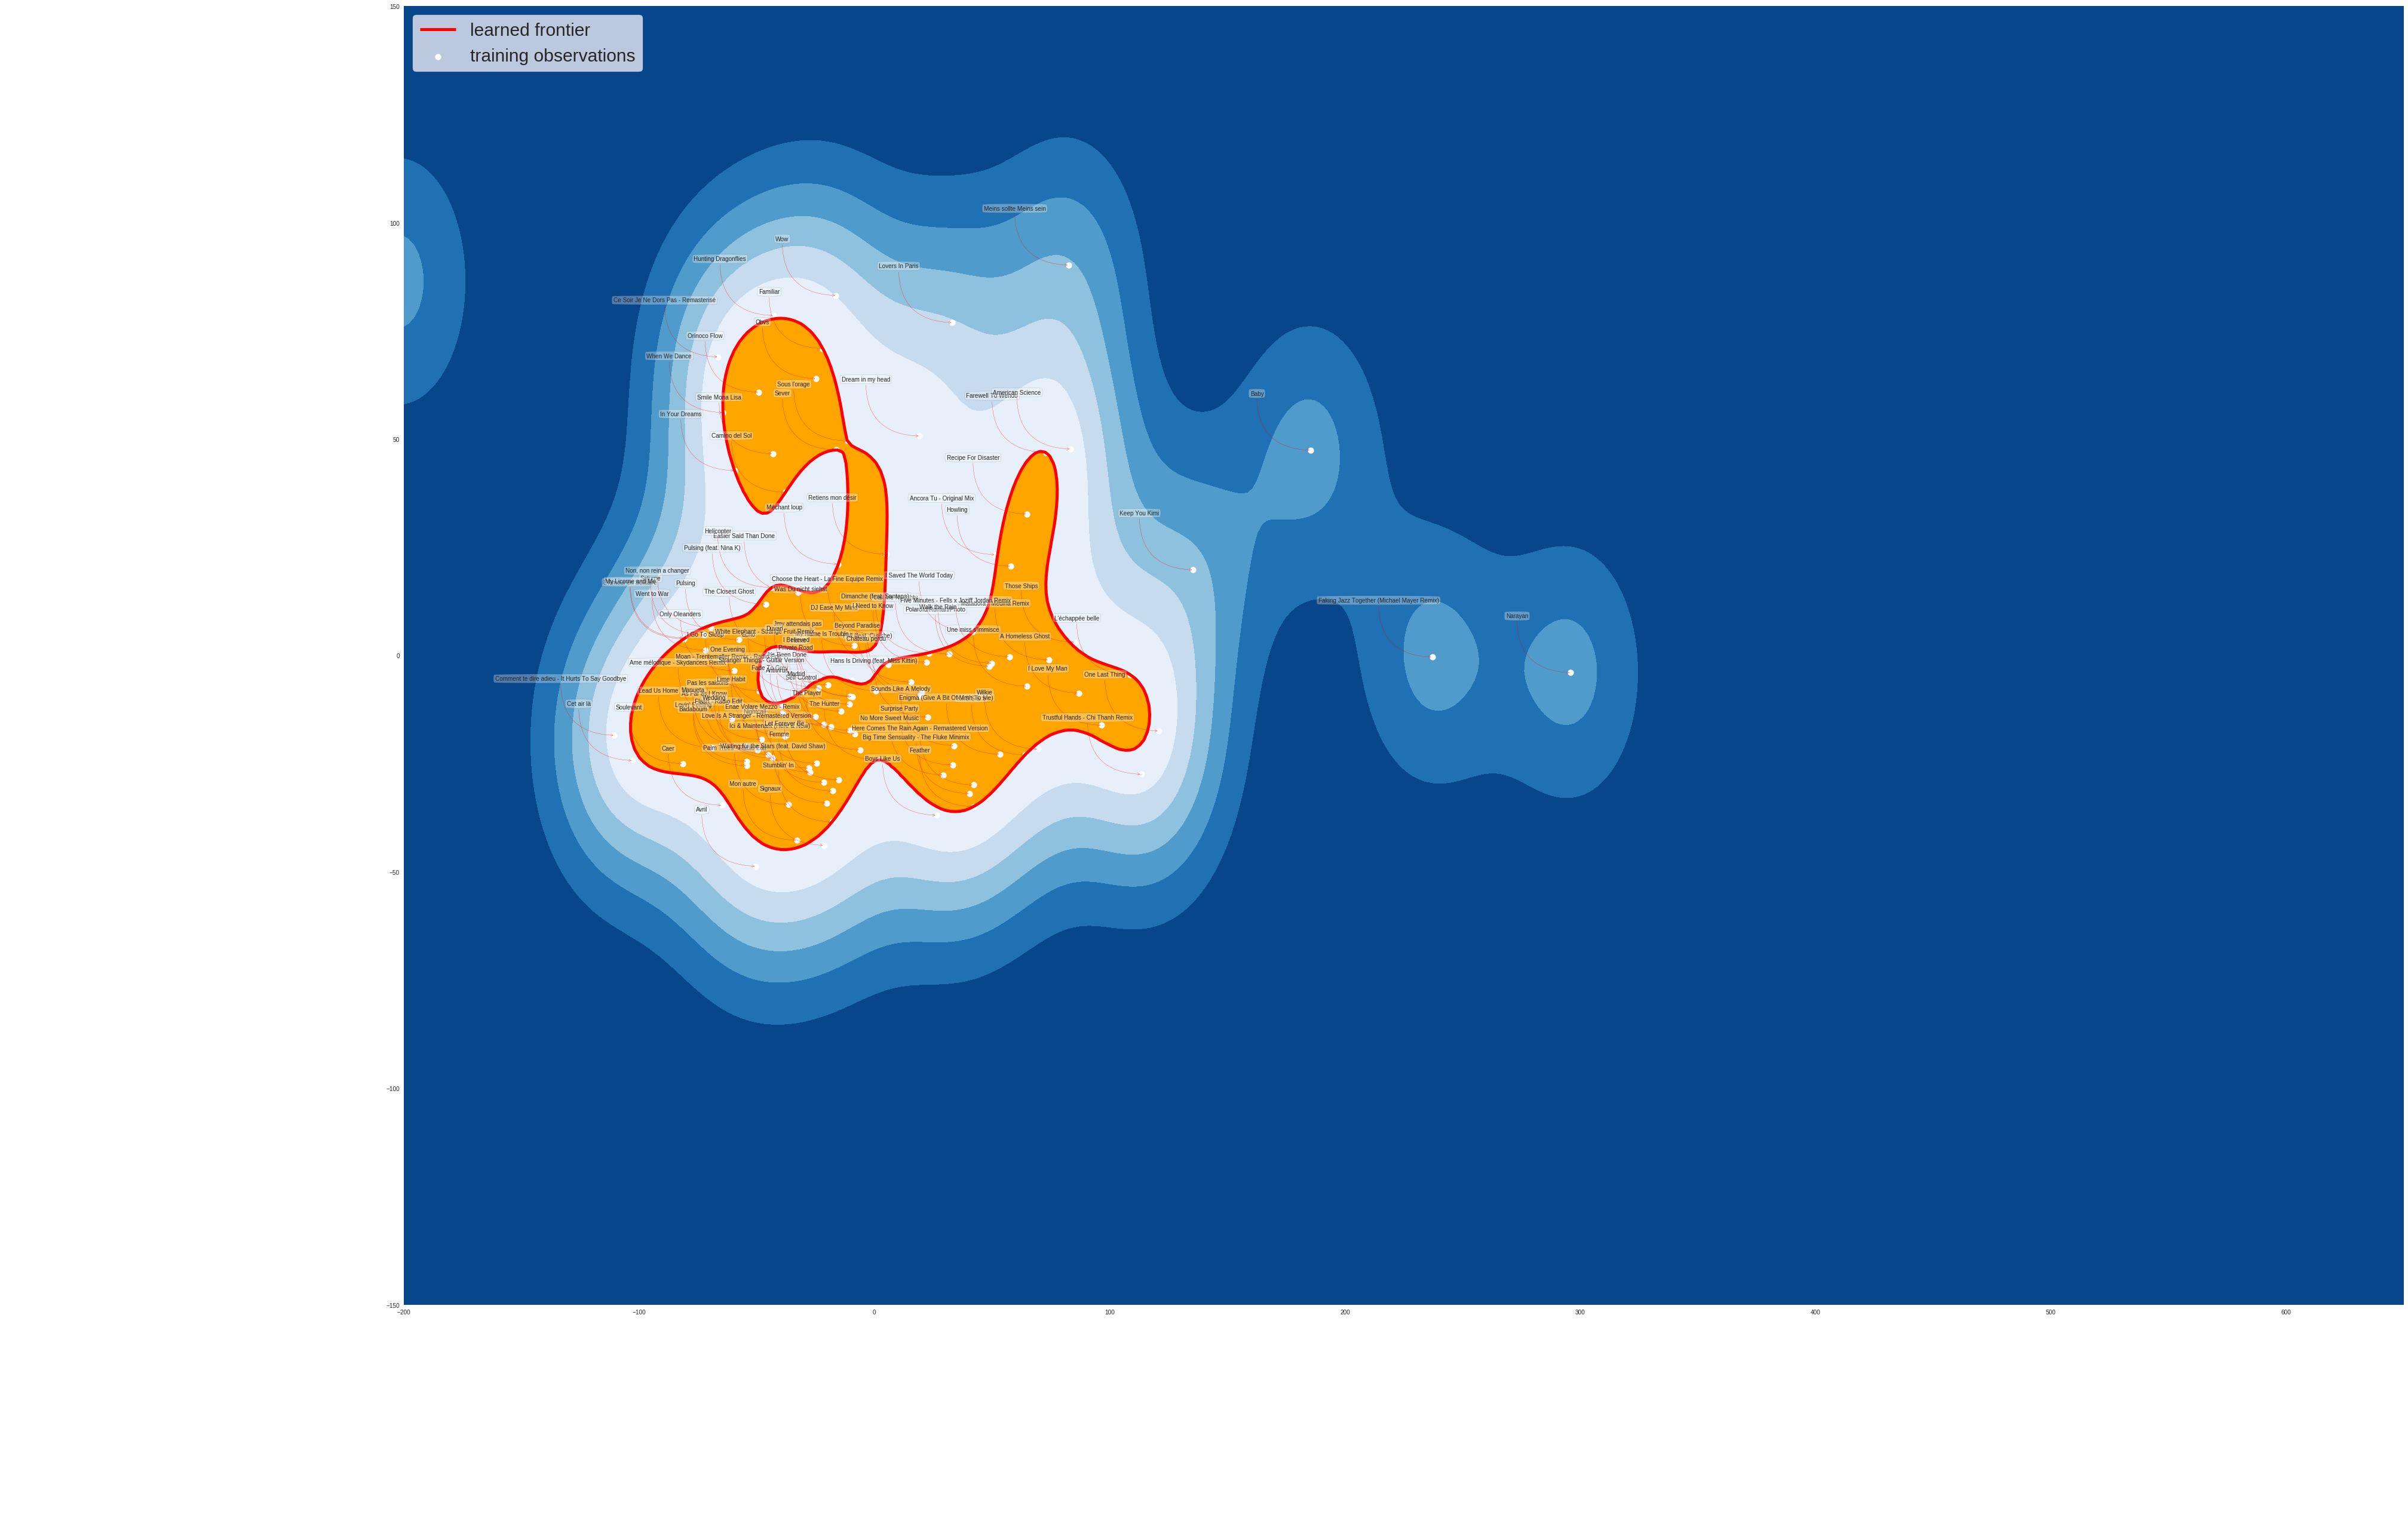

In [191]:
xx, yy = np.meshgrid(np.linspace(-200, 800, 500), np.linspace(-200,800, 500))

Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(60,40),)
#plt.title("Novelty Detection")
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 7), cmap=plt.cm.Blues_r)
a = plt.contour(xx, yy, Z, levels=[0], linewidths=5, colors='red')
plt.contourf(xx, yy, Z, levels=[0, Z.max()], colors='orange')

#visualize song titles

for row_id in range(0, len(df)):
    #if (df.ARTIST[row_id] in ['Clea Vincent']):
        target_word = df.TITLE[row_id]
        xxx = x_pca[row_id, 0]
        yyy = x_pca[row_id, 1]
        plt.annotate(target_word, (xxx,yyy), size=10, xytext=(-90,90), 
            textcoords='offset points', ha='center', va='bottom',
            bbox=dict(boxstyle='round4', fc='white', alpha=0.3),
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.5', 
                            color='red'))
   

b1 = plt.scatter(x_pca[:, 0], x_pca[:, 1], c='white', s=100)
plt.axis('tight')
plt.xlim((-200, 650))
plt.ylim((-150, 150))

leg = plt.legend([a.collections[0], b1, ],
           ["learned frontier", "training observations"],
           loc="upper left",prop={'size':30}, frameon=True)

plt.show()